### Microsoft Corporation (MSFT)

In [1]:
#matrix math 
import numpy as np

#data pre-processing 
import pandas as pd 

#visualization 
import matplotlib.pyplot as plt 

In [2]:
# import our microsoft stock data
data = pd.read_csv('MSFT.csv')

# I need a track-down
data['Ticks'] = range(0,len(data.index.values))

In [3]:
# Converting the Date to dateTime objects 
data.Date = pd.to_datetime(data.Date)

In [4]:
# Set the index to the Date
data.set_index('Date', inplace=True)

In [5]:
# checking the first 5 rows 
data.head()

,Open,High,Low,Close,Adj Close,Volume,Ticks
Date,,,,,,,
2012-09-05,30.219999,30.530001,30.209999,30.389999,25.652683,33650000,0
2012-09-06,30.500000,31.360001,30.459999,31.350000,26.463032,48371700,1
2012-09-07,31.040001,31.070000,30.730000,30.950001,26.125389,42649100,2
2012-09-10,30.830000,30.900000,30.510000,30.719999,25.931242,40524000,3
2012-09-11,30.690001,30.910000,30.610001,30.790001,25.990326,25191800,4


In [6]:
# let's code our Rolling Mean 
close_px = data['Adj Close']
mavg = close_px.rolling(window=100).mean()

### Plotting Moving Average price with Stock price chart

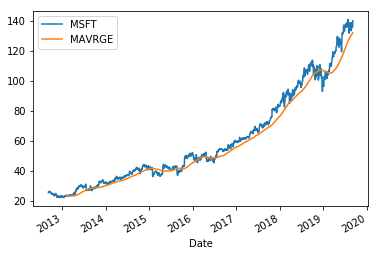

In [7]:
close_px.plot(label='MSFT')
mavg.plot(label='MAVRGE')
plt.legend()

The <b>Moving Average</b> shows increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stocks are experiencing upturn.

### Plotting of the Adjusted Closing Price

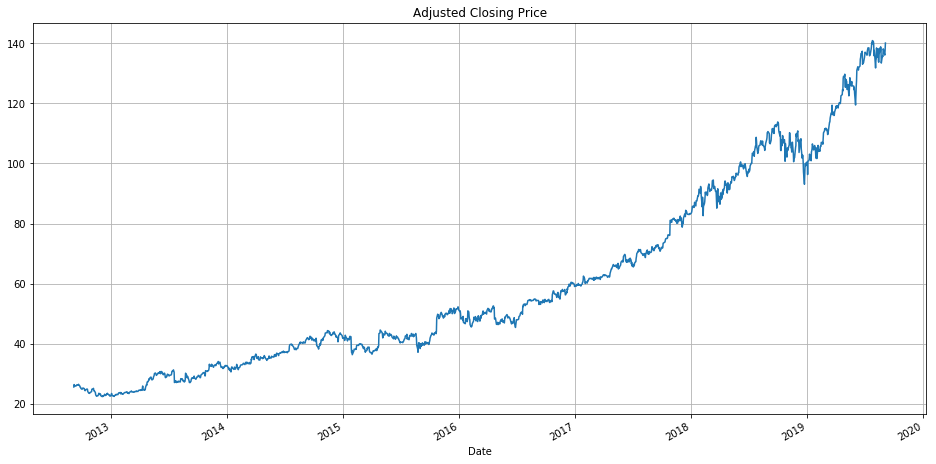

In [8]:
data['Adj Close'].plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

### Data Pre-processing 

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Ticks
Date,,,,,,,
2012-09-05,30.219999,30.530001,30.209999,30.389999,25.652683,33650000,0
2012-09-06,30.500000,31.360001,30.459999,31.350000,26.463032,48371700,1
2012-09-07,31.040001,31.070000,30.730000,30.950001,26.125389,42649100,2
2012-09-10,30.830000,30.900000,30.510000,30.719999,25.931242,40524000,3
2012-09-11,30.690001,30.910000,30.610001,30.790001,25.990326,25191800,4


In [10]:

# checking for missing data 
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticks        0
dtype: int64

## Feature Engineering

In [11]:
### Engineering new features 

data['HighLow Percentage'] = ((data.High - data.Low) / data.Close) * 100
data['OpenClose Percentage'] = ((data.Close - data.Open) / data.Open) * 100

### Dropping Open, High, Close and Low columns

data = data.drop(['Open','High','Close','Low','Volume'], axis = 1)



In [12]:
data.head()

,Adj Close,Ticks,HighLow Percentage,OpenClose Percentage
Date,,,,
2012-09-05,25.652683,0,1.052985,0.562541
2012-09-06,26.463032,1,2.870820,2.786885
2012-09-07,26.125389,2,1.098546,-0.289948
2012-09-10,25.931242,3,1.269531,-0.356799
2012-09-11,25.990326,4,0.974339,0.325839


In [13]:
data.isna().sum()

Adj Close               0
Ticks                   0
HighLow Percentage      0
OpenClose Percentage    0
dtype: int64

### Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Adj Close'],axis = 1),
                                                    data['Adj Close'], 
                                                    test_size=0.3,
                                                    )

### Models
<br><b>
<li>GradientBoosting </li> 
<li> KNN Regressor </li> 
<li> RandomForest Regressor </li> 

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

In [16]:
# Gradient Boosting Regressor 
GbostReg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=5, random_state=0, 
                                loss='ls').fit(X_train,y_train)

# KNN Regressor 
knn = KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)

# Random Forest Regressor 
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100).fit(X_train,y_train)

In [17]:
GbostReg_prediction = GbostReg.predict(X_test)
knn_prediction = knn.predict(X_test)
regr_prediction = regr.predict(X_test)

### Mean Squared Error for GradientBoost, KNN and Random Forst 

In [18]:
from sklearn import metrics
print('Mean Squared Error for GradientBoost: ',metrics.mean_squared_error(y_test,GbostReg_prediction))
print()
print('Mean Squared Error for KNN: ',metrics.mean_squared_error(y_test,knn_prediction))
print()
print('Mean Squared Error for RandomForest Regressor: ',metrics.mean_squared_error(y_test,regr_prediction))

Mean Squared Error for GradientBoost:  0.8955960752186863

Mean Squared Error for KNN:  0.6678596341244374

Mean Squared Error for RandomForest Regressor:  63.430606375436454


### Graphing Predicted with Actual for GradientBoost, KNN and Random Forest

In [19]:
# making a DataFrame for the predictions
predictionsGB = pd.DataFrame(data = GbostReg_prediction, columns = ['PredGradientBoost'])
predictionsKNN = pd.DataFrame(data = knn_prediction, columns = ['PredKNN'])
predictionsRF = pd.DataFrame(data = regr_prediction, columns = ['PredRandomForest'])
actualValue = pd.DataFrame(data = y_test.values,columns=['Actual Value'])
date = pd.DataFrame(data = X_test.index, columns = ['Date'])

In [20]:
combinedDataFrame = pd.concat([date,predictionsGB,predictionsKNN,predictionsRF,actualValue], axis=1)

In [21]:
combinedDataFrame = combinedDataFrame.set_index('Date')

In [22]:
combinedDataFrame.head()

,PredGradientBoost,PredKNN,PredRandomForest,Actual Value
Date,,,,
2016-12-02,57.546299,57.124510,57.209247,56.330643
2017-03-16,61.851835,61.770256,57.209247,61.827648
2018-03-14,90.776581,92.081192,96.961679,91.646629
2014-08-19,40.359051,40.304909,34.109693,40.577930
2013-08-22,28.002351,27.511521,34.109693,28.185926


### KNN Plot

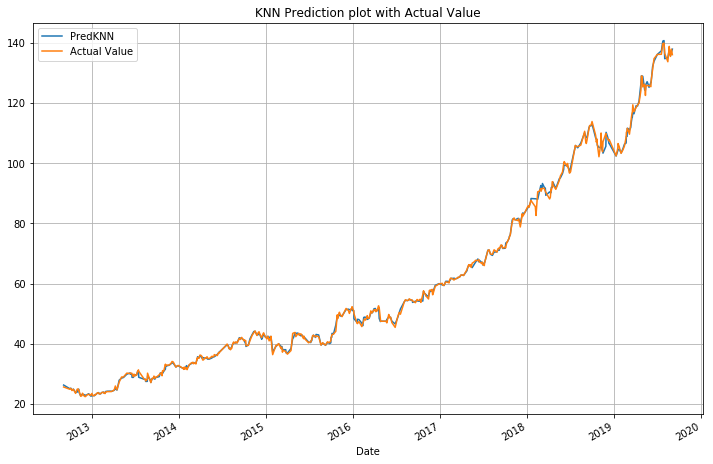

In [23]:
combinedDataFrame[['PredKNN','Actual Value']].plot(figsize=(12,8), legend = True, grid =True, title = 'KNN Prediction plot with Actual Value',)

### Gradient Boost Plot

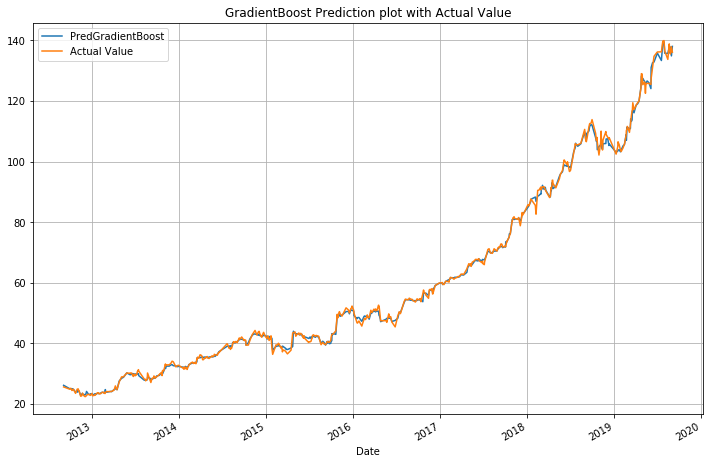

In [24]:
combinedDataFrame[['PredGradientBoost','Actual Value']].plot(figsize=(12,8), legend = True, grid =True, title = 'GradientBoost Prediction plot with Actual Value',)

### Random Forest Plot

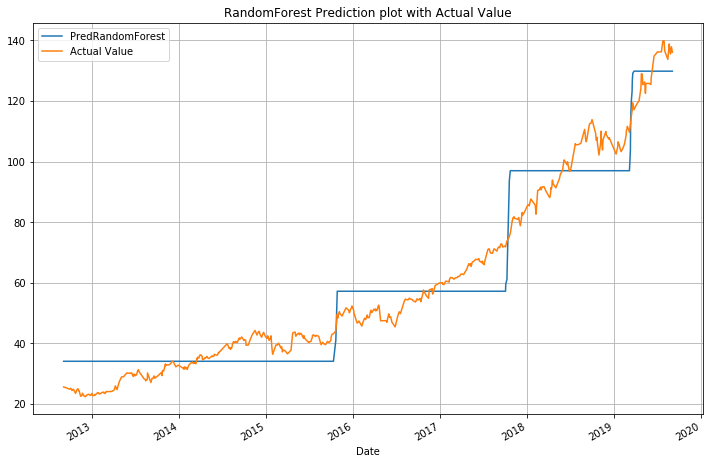

In [25]:
combinedDataFrame[['PredRandomForest','Actual Value']].plot(figsize=(12,8), legend = True, grid =True, title = 'RandomForest Prediction plot with Actual Value',)